In [8]:
!pip install ultralytics #installing package containing various YOLO models

In [9]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [10]:
# setting the visual appearance of seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

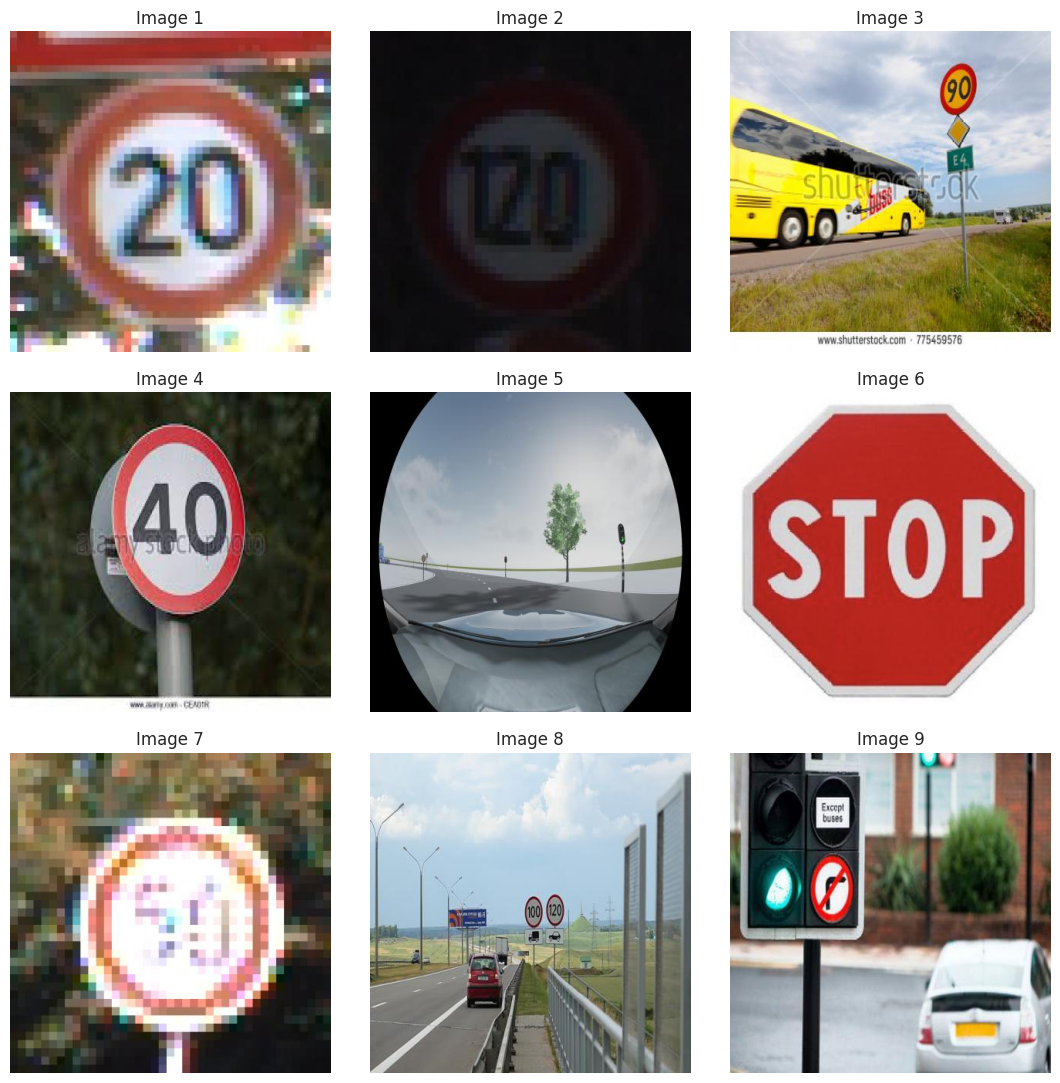

In [11]:
Image_dir = '/kaggle/input/cardetection/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# Getting the size of the input images
image = cv2.imread("/kaggle/input/cardetection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


In [13]:
# loading the YOLOv11 pre-trained model
model = YOLO('yolo11n.pt')
# fine-tuning the model on custom traffic signs dataset 
fine_tuned_model = model.train(data="/kaggle/input/yamlfile/data (1).yaml",epochs=30, batch = -1,optimizer='auto')

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/input/yamlfile/data (1).yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 13.4MB/s]
2024-10-26 10:49:06,513	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-26 10:49:07,386	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:21<00:00, 164.24it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:05<00:00, 156.93it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0004921875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.77G     0.8959      3.886      1.221          3        640: 100%|██████████| 57/57 [00:42<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        801        944     0.0416      0.773       0.17      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       8.9G     0.7495      2.725      1.103          7        640: 100%|██████████| 57/57 [00:38<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]

                   all        801        944      0.303      0.474      0.265      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.89G      0.743      2.291      1.088          8        640: 100%|██████████| 57/57 [00:38<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944       0.34      0.466       0.37      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.91G     0.7418      1.947      1.077          5        640: 100%|██████████| 57/57 [00:38<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        801        944       0.49      0.528      0.531      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       8.9G     0.7068      1.635      1.058          5        640: 100%|██████████| 57/57 [00:37<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        801        944      0.586      0.575      0.617      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.86G     0.6797      1.422      1.042          6        640: 100%|██████████| 57/57 [00:37<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944      0.698       0.65      0.712      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.91G     0.6768      1.272      1.037          4        640: 100%|██████████| 57/57 [00:37<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        801        944      0.811      0.665      0.773       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       8.9G     0.6568      1.195      1.037          2        640: 100%|██████████| 57/57 [00:38<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        801        944      0.818      0.723      0.813      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.86G     0.6348      1.081      1.019          5        640: 100%|██████████| 57/57 [00:37<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        801        944      0.914      0.734      0.862      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       8.9G     0.6362       1.03      1.015          5        640: 100%|██████████| 57/57 [00:38<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        801        944       0.91      0.754      0.873      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.73G     0.6205     0.9739      1.009          4        640: 100%|██████████| 57/57 [00:38<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944      0.916      0.761      0.869      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.91G     0.6065     0.9071      1.005          7        640: 100%|██████████| 57/57 [00:37<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        801        944       0.91      0.793      0.896      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       8.9G     0.6132     0.8871      1.006          4        640: 100%|██████████| 57/57 [00:37<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        801        944      0.921      0.776      0.885      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.86G     0.5889     0.8313     0.9937          5        640: 100%|██████████| 57/57 [00:37<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944      0.922        0.8      0.904       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.88G     0.5801     0.8152      0.989          2        640: 100%|██████████| 57/57 [00:37<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        801        944      0.876      0.805      0.887      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       8.9G     0.5798     0.7874     0.9866          4        640: 100%|██████████| 57/57 [00:38<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        801        944      0.923      0.847       0.92      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       8.9G     0.5756     0.7423     0.9817          4        640: 100%|██████████| 57/57 [00:37<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        801        944      0.931      0.807      0.916       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.86G     0.5785     0.7512     0.9905          3        640: 100%|██████████| 57/57 [00:37<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        801        944       0.94      0.836      0.923      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       8.9G     0.5689     0.7236     0.9873          5        640: 100%|██████████| 57/57 [00:38<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        801        944      0.914      0.852      0.929      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.86G     0.5541     0.6943     0.9756          2        640: 100%|██████████| 57/57 [00:37<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.40it/s]

                   all        801        944      0.942      0.845      0.932      0.801


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.85G     0.5585     0.5317      0.955          2        640: 100%|██████████| 57/57 [00:39<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        801        944      0.931      0.866      0.936      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.84G     0.5503     0.5149     0.9389          3        640: 100%|██████████| 57/57 [00:36<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        801        944      0.939      0.853      0.938      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.85G     0.5367      0.481     0.9408          2        640: 100%|██████████| 57/57 [00:36<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        801        944       0.96      0.842       0.94      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.84G     0.5318     0.4643     0.9315          2        640: 100%|██████████| 57/57 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        801        944       0.93      0.879      0.942      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.84G     0.5341     0.4493      0.929          3        640: 100%|██████████| 57/57 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        801        944      0.956      0.865      0.946      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.85G     0.5139     0.4162     0.9209          2        640: 100%|██████████| 57/57 [00:36<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        801        944       0.92      0.896      0.951      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.84G      0.527     0.4148     0.9251          5        640: 100%|██████████| 57/57 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944      0.926      0.897      0.951      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.85G     0.5039     0.3952     0.9174          2        640: 100%|██████████| 57/57 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        801        944      0.929        0.9      0.956      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.84G     0.4918     0.3821     0.9097          3        640: 100%|██████████| 57/57 [00:37<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        801        944      0.939      0.904      0.956      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.84G     0.4955     0.3776     0.9101          2        640: 100%|██████████| 57/57 [00:37<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        801        944      0.948      0.903      0.958      0.829



30 epochs completed in 0.367 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,585,077 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


                   all        801        944      0.948      0.903      0.958      0.829
           Green Light         87        122      0.897      0.711      0.834      0.497
             Red Light         74        108      0.894      0.722      0.845      0.524
       Speed Limit 100         52         52      0.972      0.942      0.991      0.901
       Speed Limit 110         17         17      0.771      0.941       0.94      0.852
       Speed Limit 120         60         60      0.982          1      0.994      0.916
        Speed Limit 20         56         56          1      0.958      0.984      0.879
        Speed Limit 30         71         74       0.97      0.959      0.985      0.918
        Speed Limit 40         53         55      0.983      0.909      0.986       0.88
        Speed Limit 50         68         71      0.994      0.887      0.976      0.866
        Speed Limit 60         76         76      0.901      0.895      0.962      0.893
        Speed Limit 7

In [14]:
model.save('/kaggle/working/fine_tuned_model.pt')

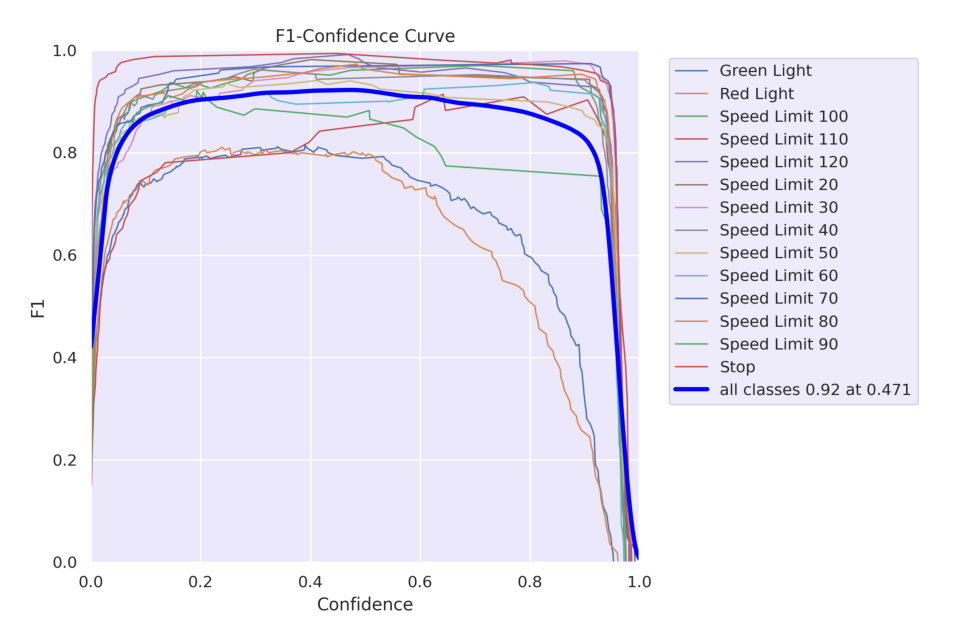

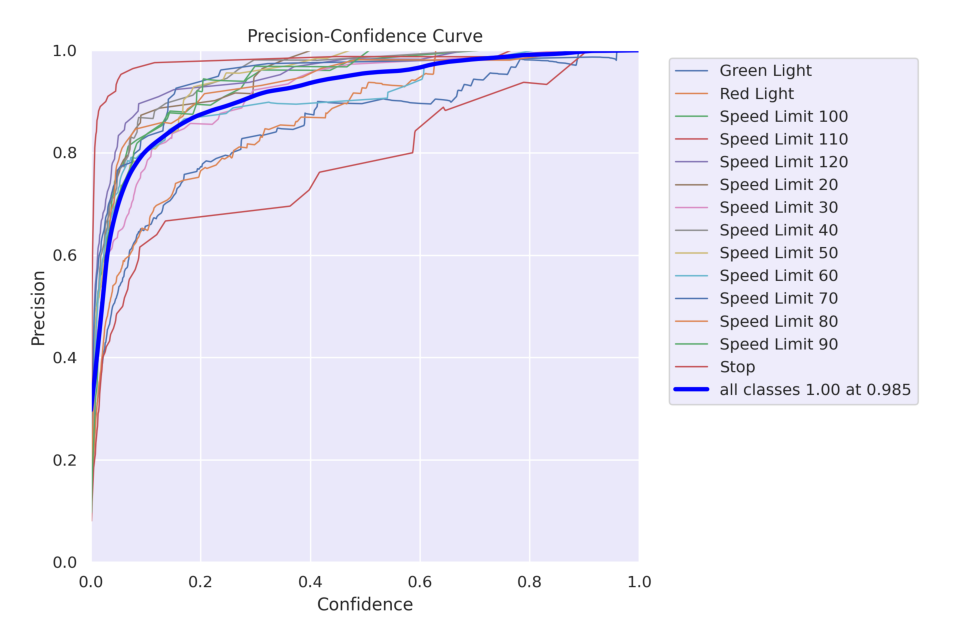

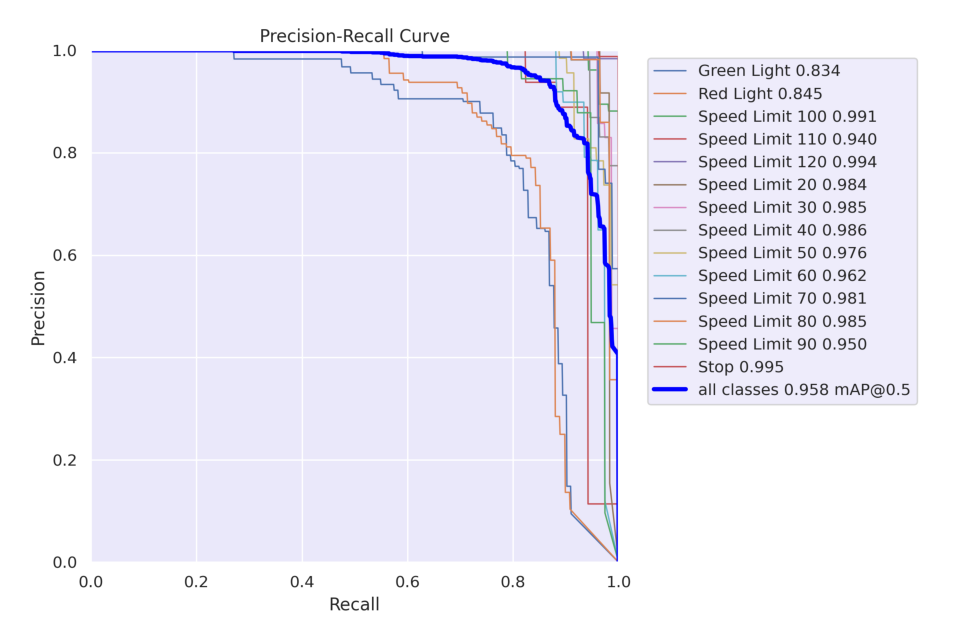

In [16]:
def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
# check the path when the model is trained and update the path accordingly
post_training_files_path = '/kaggle/working/runs/detect/train3'

# Display the images
display_images(post_training_files_path, image_files)


In [17]:
# displaying the overall performance metrics after fine tuning the model
# check the path when the model is trained and update the path accordingly
results = pd.read_csv('/kaggle/working/runs/detect/train3/results.csv')
results.tail(10)

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21   939.708         0.55852         0.53166         0.95501   
21     22   982.040         0.55027         0.51487         0.93886   
22     23  1024.690         0.53670         0.48102         0.94079   
23     24  1066.740         0.53183         0.46433         0.93155   
24     25  1108.500         0.53406         0.44929         0.92905   
25     26  1150.760         0.51386         0.41625         0.92093   
26     27  1192.770         0.52701         0.41477         0.92513   
27     28  1234.670         0.50393         0.39521         0.91743   
28     29  1277.700         0.49175         0.38212         0.90966   
29     30  1321.110         0.49552         0.37756         0.91014   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.93105            0.86583           0.93573   
21               0.93934            0.85268           0.93761   
22               0.96002            0.84184           0.93997   
23               0.92964            0.87942           0.94210   
24               0.95641            0.86511           0.94643   
25               0.92032            0.89578           0.95065   
26               0.92621            0.89667           0.95108   
27               0.92893            0.90020           0.95562   
28               0.93895            0.90449           0.95620   
29               0.94793            0.90294           0.95787   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.80132       0.58804       0.44179       0.98128  0.000179   
21              0.80053       0.56775       0.42742       0.95746  0.000161   
22              0.80822       0.57985       0.40610       0.96410  0.000144   
23              0.80929       0.56913       0.39564       0.95841  0.000127   
24              0.81400       0.56475       0.38497       0.95988  0.000109   
25              0.81917       0.55607       0.37162       0.95192  0.000092   
26              0.81875       0.56118       0.37144       0.95231  0.000075   
27              0.82478       0.55109       0.35685       0.94910  0.000057   
28              0.82355       0.54748       0.35046       0.94743  0.000040   
29              0.82857       0.54406       0.34395       0.94467  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

In [18]:
# Read the results.csv file as a pandas dataframe
results.columns = results.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=results, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=results, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=results, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=results, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=results, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=results, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=results, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=results, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=results, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=results, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [19]:
# Loading the best performing model
# check the path when the model is trained and update the path accordingly
Valid_model = YOLO('/kaggle/working/runs/detect/train3/weights/best.pt')

# Evaluating the model on the validation set
# "model.train" "model.val" "model.test" are methods in Ultralytics YOLO library which evaluates the "model" on "train,val,test" respectively
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,585,077 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:02<00:00, 392.33it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:07<00:00,  6.95it/s]


                   all        801        944      0.948      0.903      0.959       0.83
           Green Light         87        122      0.897      0.711      0.843      0.499
             Red Light         74        108      0.894      0.722      0.846      0.525
       Speed Limit 100         52         52      0.972      0.942      0.991      0.904
       Speed Limit 110         17         17      0.771      0.941      0.944      0.851
       Speed Limit 120         60         60      0.982          1      0.994      0.915
        Speed Limit 20         56         56          1      0.958      0.984       0.88
        Speed Limit 30         71         74      0.969      0.959      0.985      0.919
        Speed Limit 40         53         55      0.984      0.909      0.986      0.877
        Speed Limit 50         68         71      0.995      0.887      0.976      0.868
        Speed Limit 60         76         76      0.901      0.895      0.961      0.893
        Speed Limit 7

In [21]:
# pre-processing test images and displaying output
def normalize_image(image):
    return image / 255.0

def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to test images
dataset_path = '/kaggle/input/cardetection/car'  
test_images_path = os.path.join(dataset_path, 'test', 'images')

image_files = [file for file in os.listdir(test_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(test_images_path, selected_images[i])
            
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                resized_image = resize_image(image, size=(640, 640))
                normalized_image = normalize_image(resized_image)
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()



0: 640x640 1 Speed Limit 50, 1 Speed Limit 80, 10.6ms
Speed: 2.2ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 1 Speed Limit 110, 9.2ms
Speed: 2.6ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 9.6ms
Speed: 2.4ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 9.0ms
Speed: 2.2ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 9.1ms
Speed: 1.8m

In [22]:
# pre-processing input video and displaying output at every 10 frames
from IPython.display import clear_output, display

def normalization(image):
    return image / 255.0

def resizing(image, size=(640, 640)):
    return cv2.resize(image, size)

def process_video(video_path, model, max_frames=None, display_frequency=10):
    cap = cv2.VideoCapture(video_path)
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    if max_frames is None or max_frames > total_frames:
        max_frames = total_frames
    
    # Create a figure for displaying the video
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.close()  # Prevent the empty figure from displaying
    
    pbar = tqdm(total=max_frames, desc="Processing video")
    class_names =["Green Light",
    "Red Light",
    "Speed Limit 10",
    "Speed Limit 100",
    "Speed Limit 110",
    "Speed Limit 120",
    "Speed Limit 20",
    "Speed Limit 30",
    "Speed Limit 40",
    "Speed Limit 50",
    "Speed Limit 60",
    "Speed Limit 70",
    "Speed Limit 80",
    "Speed Limit 90",
    "Stop"]
    frame_count = 0
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        original_height, original_width = frame.shape[:2]
        resized_frame = resizing(frame, size=(640, 640))
        
        normalized_frame = normalization(resized_frame)
        
        # Convert the normalized frame to uint8 data type
        normalized_frame_uint8 = (normalized_frame * 255).astype(np.uint8)
        
        # Predict with the model
        results = model.predict(source=normalized_frame_uint8, imgsz=640, conf=0.5, show=False, save=False)
        
        # Convert BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display the frame at specified frequency
        if frame_count % display_frequency == 0:
            clear_output(wait=True)
            ax.clear()
            ax.imshow(frame_rgb)
            
            # Plot bounding boxes
            for box,cls in zip(results[0].boxes.xyxy,results[0].boxes.cls):
                x1, y1, x2, y2 = box.tolist()
                scale_x = original_width / 640
                scale_y = original_height / 640
#             scaling the coordinates so that the bounding boxes fit properly
                x1 = int(x1 * scale_x)
                y1 = int(y1 * scale_y)
                x2 = int(x2 * scale_x)
                y2 = int(y2 * scale_y)
                rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red', linewidth=2)
                ax.add_patch(rect)
                
                class_name = class_names[int(cls)]
                ax.text(x1, y1, class_name, fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.5))
            ax.axis('off')
            ax.set_title(f"Frame {frame_count}/{max_frames}")
            display(fig)
        
        frame_count += 1
        pbar.update(1)
    
    cap.release()
    pbar.close()
    plt.close(fig)

video_path = '/kaggle/input/speed-and-traffic-sign-detection-test/test video.mp4'
process_video(video_path, model, max_frames=10000, display_frequency=10)


0: 640x640 1 Green Light, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 9.6ms
Speed: 1.4ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 9.3ms
Speed: 1.4ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.7ms postprocess 